In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples per class
n_samples = 100

# Generate class 1 (label 1)
x1_class1 = np.random.uniform(2, 5, n_samples)
x2_class1 = np.random.uniform(3, 6, n_samples)
class1 = np.column_stack((x1_class1, x2_class1))
labels_class1 = np.ones((n_samples, 1))

# Generate class 2 (label -1)
x1_class2 = np.random.uniform(-1, 2, n_samples)
x2_class2 = np.random.uniform(-2, 1, n_samples)
class2 = np.column_stack((x1_class2, x2_class2))
labels_class2 = -np.ones((n_samples, 1))

# Combine the data
features = np.vstack((class1, class2))
labels = np.vstack((labels_class1, labels_class2)).flatten().reshape(-1,1)

# w = 2, features
# 
n, m= features.shape
w = np.random.rand(1 , 2) * 0.01
w.shape

(1, 2)

In [97]:
def f(x, w):
    return np.dot(w, x.T)

# z1 = f(features, w)
# a1 = z1.T

# # a1.shape
# # labels.shape
# loss = np.sum(1/200 * (labels - a1)**2)
# loss

In [123]:
def backward(x, y, w, z1, a1):
    dL_da1 = -(y - a1)
    da1_dz1 = 1
    delta_L = dL_da1 * da1_dz1
    dz1_dw1 = x
    dL_dw1 = np.dot(delta_L.T , dz1_dw1) / len(x)
    return dL_dw1

In [135]:
r = 0.0001
epochs = 10000
losses = []
for epoch in range(epochs):
    z1 = f(features, w)
    a1 = z1.T
    loss = np.sum((labels - a1)**2) / (2 * len(labels))
    losses.append(loss)

    dL_dw1 = backward(features, labels, w, z1, a1)
    w -= r * dL_dw1
    if np.isnan(w).any():
        print(f"NaN detected at epoch {epoch}. Stopping training.")
        break

print("Final weights:", w)


Final weights: [[-0.07242345  0.27073832]]


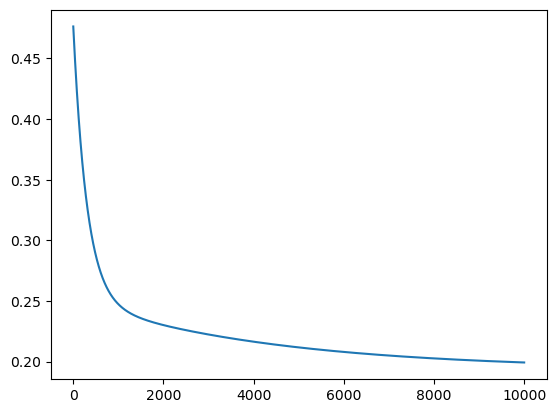

In [139]:
plt.plot(losses)